# Tarea 3
### Luis Armando Pérez Rey

### NOTA
Este notebook se iniciará en la clase; la resolución completa debe ser enviada como "Tarea3.ipynb", desde su carpeta de tareas. Se puede hacer en equipo, con un máximo de dos personas. Si se hace en equipo, incluyan ambos nombres de manera clara.

En este notebook, implementarán funciones que calculan la derivada numéricamente, de una función $f(x)$ en un punto $x_0$ dado.

## Derivada *derecha*

Para caclular la derivada derecha utilizaremos la fórmula siguiente:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0)}{h},
\end{equation}

Crearemos una función que tome como argumentos a la función $f$, a la $h$ y al punto donde queremos calcular la derivada $x_0$. Modificando el valor de $h$ podemos obtener distintas aproximaciones de la derivada.  




In [2]:
using PyPlot

INFO: Recompiling stale cache file /home/luis/.julia/lib/v0.4/FixedPointNumbers.ji for module FixedPointNumbers.
INFO: Recompiling stale cache file /home/luis/.julia/lib/v0.4/PyPlot.ji for module PyPlot.
INFO: Recompiling stale cache file /home/luis/.julia/lib/v0.4/PyCall.ji for module PyCall.
INFO: Recompiling stale cache file /home/luis/.julia/lib/v0.4/Colors.ji for module Colors.
INFO: Recompiling stale cache file /home/luis/.julia/lib/v0.4/ColorTypes.ji for module ColorTypes.
INFO: Recompiling stale cache file /home/luis/.julia/lib/v0.4/LaTeXStrings.ji for module LaTeXStrings.


In [3]:
function derivada_derecha(f::Function,h::Float64,x0=0.0)
    salida=Float64((f(x0+h)-f(x0))/h)
end

derivada_derecha (generic function with 2 methods)

Como prueba, utilizaremos la función $f(x) = 3x^3-2$ y calcularemos su derivada en el punto $x_0=1$. Luego compararemos los resultados respecto al valor analítico de la derivada el cual es: $f'(1)=9$. La diferencia absoluta entre el valor analítico y el valor de la aproximación nos indicará que tan buena es nuestra aproximación. De forma que definiremos el error absoluto como $\Delta=f'(1)-f'_{aproximación}(1)$

In [4]:
nextfloat(typemin(Float64))

-1.7976931348623157e308

In [5]:
f(x)=3*x^3-2;

In [6]:
derivada_analitica=9.0;

Calcularemos el error absoluto para un rango de valores de $h$ entre $\{10^{-3},10^{-15}\}$ y veremos como convergen las aproximaciones al valor analítico en función de la $h$.

In [7]:
#Definimos los exponentes en un rango de valores entre 3 y 15
hh=linspace(3.0,15.0,100); 
#Sacamos su inverso aditivo
hh=-(hh); 
#Elevamos a 10 a la potencia de cada exponente
h=10.^hh;

In [8]:
#Definimos un vector donde guardaremos los errores absolutos obtenidos
derivada1=Float64[];
#Calculamos el error absoluto de cada aproximación en función de las h definidas anteriormente
for i in h
    Δ=abs(derivada_analitica-derivada_derecha(f,i,1.0))
    push!(derivada1,Δ)
end

Para poder identificar el comportamiento de nuestros errores absolutos graficamos con escala logarítmica para apreciar mejor el cambio en nuestras aproximaciones.

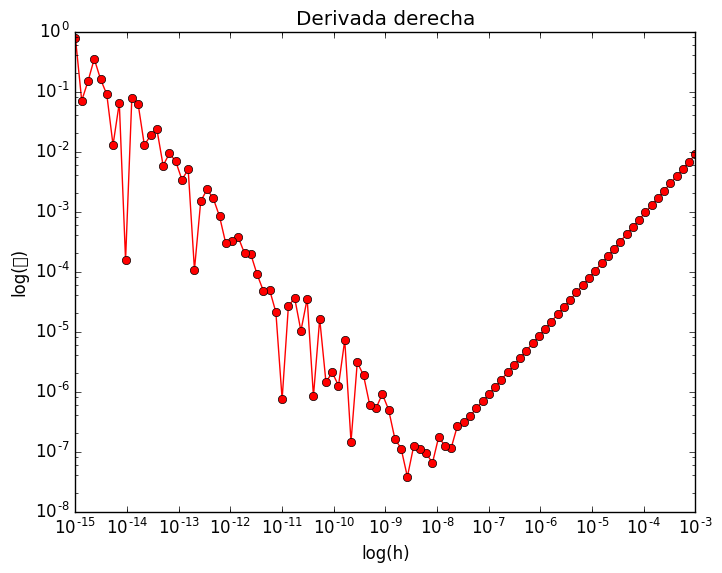

PyObject <matplotlib.text.Text object at 0x7f42ddeb4748>

In [9]:
loglog(h,derivada1,"ro-")
xlabel("log(h)")
ylabel("log(Δ)")
title("Derivada derecha")

Pareciera que al principio para valores "grandes" de $h$ nuestra aproximación converge al valor analítico de la derivada. ¿Con qué orden? Veamos a partir de la pendiende de los datos en escala logarítmica.

In [10]:
orden_convergencia=(log(derivada1[1])-log(derivada1[2]))/(log(h[1])-log(h[2]))

1.0002907732209354

¿Qué es lo que pasa? Para valores de $h$ entre $\{10^{-8},10^{-3}\}$ tenemos que nuestras aproximaciones empiezan a converger al valor de la derivada de forma aproximadamente lineal. Sin embargo, para aproximaciones con $h$ menor que $10^{-8}$ estas comienzan a diverger de nuevo. ¡Esto es horroroso!. Nosotros querríamos que conforme $h\to 0$ entonces $\Delta \to 0$, pero entonces... ¿Qué pasa? El probable culpable de estos errores reside en la resta de números con diferencias extremadamente pequeñas. 

Recordemos que nuestro menor valor de diferencia entre dos flotantes es de:

In [11]:
eps(Float64)

2.220446049250313e-16

En nuestra función $f(x) = 3x^3-2$ estamos teniendo un valor de $(x+h)^3=x^3+3x^2h+3xh^2+h^3$ por lo que tenemos un término de $h^2$ y $h^3$ que en caso de ser $h=10^{-8}$ se volverán $h^3=10^{-24}$ y $h^2=10^{-16}$ que son justamente más pequeños o del orden que la $\epsilon=2.2\times10^{-16}$. Al no tomar esto en cuenta, en la diferencia entre $f(x+h)-f(x)$ tendremos problemas, por lo que esto causa la divergencia de nuestro método justamente en $h=10^{-8}$

## Derivada simétrica

En ésta aproximación se utiliza la fórmula siguiente:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}.
\end{equation}

Repetiremos el 
mismo procedimiento que con la derivada derecha para poder observar su comportamiento.



In [12]:
function derivada_simetrica(f::Function,h::Float64,x0=0.0)
    salida=(f(x0+h)-f(x0-h))/(2*h)
end

derivada_simetrica (generic function with 2 methods)

Nuevamente, utilizando nuestra función de prueba veremos como se comporta el error absoluto $\Delta$ de nuestras aproximaciones respecto al valor de $h$ que utilicemos.

In [13]:
derivada2=Float64[];
for i in h
    Δ=abs(derivada_analitica-derivada_simetrica(f,i,1.0))
    push!(derivada2,Δ)
end

Para ver los resultados graficamos nuevamente en escala logarítmica

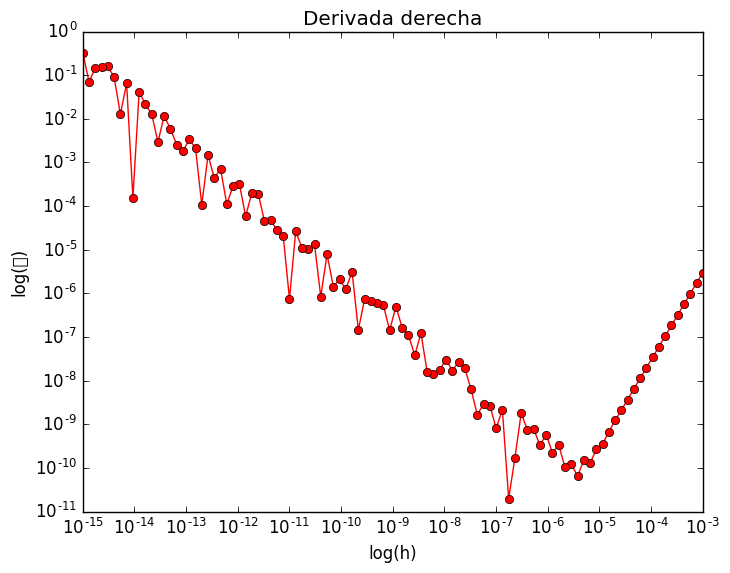

PyObject <matplotlib.text.Text object at 0x7f42dacaf908>

In [14]:
loglog(h,derivada2,"ro-")
xlabel("log(h)")
ylabel("log(Δ)")
title("Derivada derecha")

Calculamos la pendiente de las aproximaciones de la derivada para $h$ de un orden alto para ver cómo converge la aproximación en términos de $h$

In [15]:
orden_convergencia=(log(derivada2[1])-log(derivada2[2]))/(log(h[1])-log(h[2]))

2.0000006815764313

Pasa lo mismo!!! Tenemos que para valores de $h$ mayores a $10^{-5}$ la función converge cuadráticamente. Sin embargo para valores menores nuevamente la derivada empieza a diverger. 
Recordemos la explicación que dimos anteriormente para la derivada derecha. Solo que en este caso el efecto será del doble de forma que nuestra divergencia comenzará en valores de $h=10^{-5}$ esto es por la resta de $f(x+h)-f(x-h)$ que mete dos veces este mismo error en la aproximación.

## Derivada *compleja*

En el método de derivada compleja utilizaremos la siguiente función para aproximar a la derivada:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \Im\Big(\frac{f(x_0+ i h)}{h}\Big).
\end{equation}

Donde $\Im$ representa a la parte imaginaria. Nuevamente veremos qué es lo que ocurre para distintos órdenes de magnitud de $h$.


In [16]:
function derivada_compleja(f::Function,h::Float64,x0=0.0)
    salida=imag(f(x0+im*h)/h)
end

derivada_compleja (generic function with 2 methods)

Calculando para distintos órdenes de magnitud el error absoluto.

In [17]:
derivada3=Float64[];
for i in h
    Δ=abs(derivada_analitica-derivada_compleja(f,i,1.0))
    push!(derivada3,Δ)
end

Graficando en escala logarítmica.

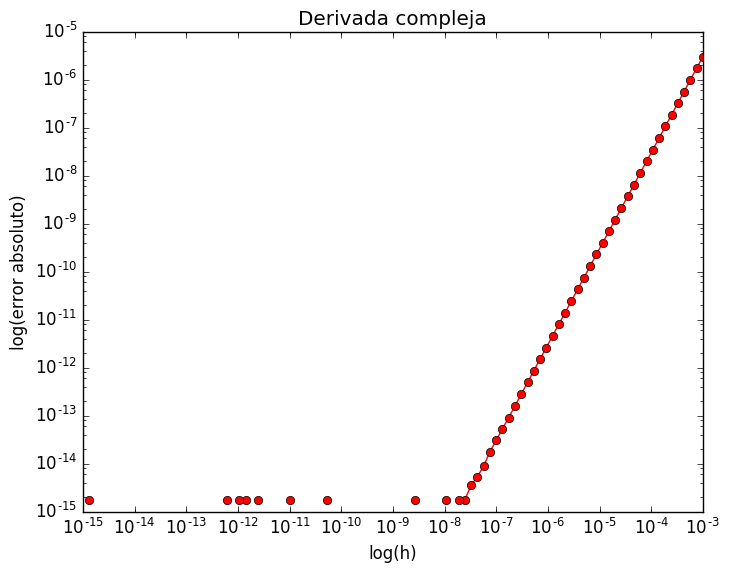

PyObject <matplotlib.text.Text object at 0x7f42dac65c88>

In [18]:
loglog(h,derivada3,"ro-")
xlabel("log(h)")
ylabel("log(error absoluto)")
title("Derivada compleja")

Calculamos la pendiente de las aproximaciones de la derivada para $h$ de un orden alto para ver cómo converge la aproximación en términos de $h$

In [19]:
orden_convergencia=(log(derivada3[1])-log(derivada3[2]))/(log(h[1])-log(h[2]))

2.000000002255785

En éste método, ¡Podemos saltar de alegría!. Tenemos que las aproximaciones convergen de forma cuadrática al valor de la derivada analítica para valores mayores a $10^-8$ y no solo eso, sino que para valores menores de $h$ la derivada no diverge e incluso para algunos valores llega a ser exactamente el valor esperado. Esto hace a éste método claramente el más conveniente de todos por sus características.

Podemos comparar entonces a los tres métodos de derivación numérica:


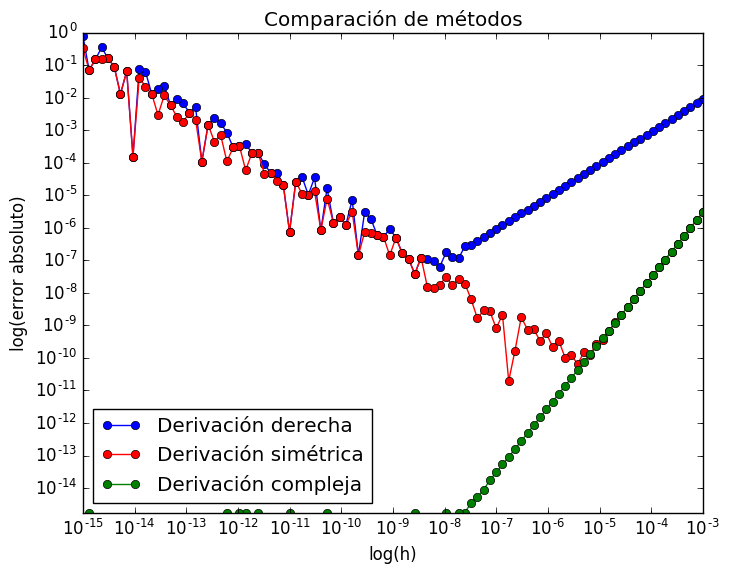

PyObject <matplotlib.text.Text object at 0x7f42d7e30630>

In [38]:
loglog(h,derivada1,"bo-", label="Derivación derecha")
loglog(h,derivada2,"ro-", label="Derivación simétrica")
loglog(h,derivada3,"go-", label="Derivación compleja")
legend(loc="lower left")
ylim(0,1)
title("Comparación de métodos")
xlabel("log(h)")
ylabel("log(error absoluto)")

Como podemos ver en la gráfica en conjunto de los tres métodos de diferenciación, tanto el método simétrico y derecho de diferenciación comienzan a diverger para valores de $h$ lo suficientemente pequeños. En cambio, para la diferenciación compleja, para valores pequeños de $h$ converge al valor esperado de la derivada. Pero no solo eso. En el caso de la diferenciación derecha, nuestras derivadas convergen al valor analítico de forma lineal. Mientras que en la derivada simétrica y compleja, convergen de forma cuadrática. En estos términos podemos decir que el mejor método numérico es el de derivación compleja pues converge más "rápidamente" en términos de $h$ al valor analítico y además los resultados son estables y no comienzan a diverger.